In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import keras.utils as ku
import matplotlib.pyplot as plt

In [2]:
train_data=ku.image_dataset_from_directory(directory='veg_train',image_size=(256,256))
                                    

Found 15000 files belonging to 15 classes.


In [3]:
test_data=ku.image_dataset_from_directory(directory='veg_test',image_size=(256,256))

Found 2999 files belonging to 15 classes.


In [4]:
validation_data=ku.image_dataset_from_directory(directory='veg_validation',image_size=(256,256))

Found 3000 files belonging to 15 classes.


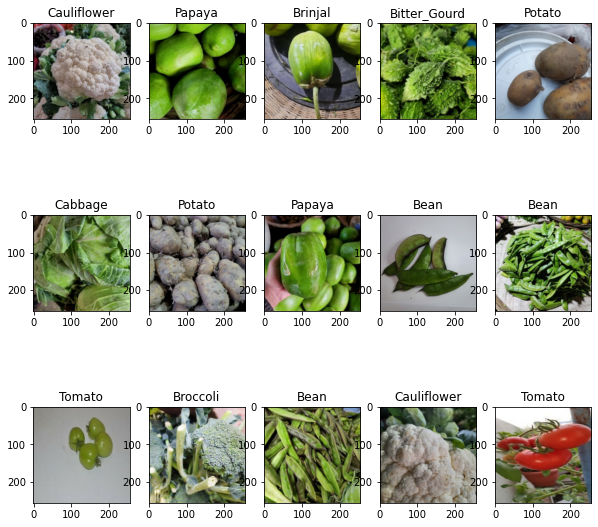

In [5]:
class_names = train_data.class_names

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [6]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [7]:
#Model Building using CNN
#Instantiate the model
model=keras.Sequential()
#Add a convolutional layer

model.add(keras.layers.Conv2D(32,3,3,input_shape=(256,256,3),activation="relu"))
#Adding a max pooling layer

model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64,3,3,activation="relu"))

#Adding a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128,3,3,activation="relu"))

#Adding a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
#Adding a Flatten layer

model.add(keras.layers.Flatten())

#Network
model.add(keras.layers.Dense(units=256,input_dim=256,activation="relu")) 
model.add(keras.layers.Dense(units=15,activation="softmax"))
#Compliation
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")



In [8]:
model.fit(train_data,validation_data=validation_data,epochs=10)

Epoch 1/10
469/469 [==============================] - 361s 745ms/step - loss: 1.7018 - accuracy: 0.4910 - val_loss: 1.0253 - val_accuracy: 0.6583
Epoch 2/10
469/469 [==============================] - 139s 288ms/step - loss: 0.7424 - accuracy: 0.7607 - val_loss: 0.5079 - val_accuracy: 0.8403
Epoch 3/10
469/469 [==============================] - 92s 196ms/step - loss: 0.4551 - accuracy: 0.8515 - val_loss: 0.4259 - val_accuracy: 0.8740
Epoch 4/10
469/469 [==============================] - 93s 197ms/step - loss: 0.3200 - accuracy: 0.8975 - val_loss: 0.3723 - val_accuracy: 0.8850
Epoch 5/10
469/469 [==============================] - 93s 197ms/step - loss: 0.2332 - accuracy: 0.9236 - val_loss: 0.4915 - val_accuracy: 0.8557
Epoch 6/10
469/469 [==============================] - 92s 196ms/step - loss: 0.2008 - accuracy: 0.9349 - val_loss: 0.3959 - val_accuracy: 0.8863
Epoch 7/10
469/469 [==============================] - 93s 197ms/step - loss: 0.1684 - accuracy: 0.9473 - val_loss: 0.3474 - val_

In [9]:
model.evaluate(train_data)

469/469 [==============================] - 39s 83ms/step - loss: 0.1433 - accuracy: 0.9611


[0.14330267906188965, 0.9611333608627319]

In [10]:
def predict(path):
    #Loading the image
    test_image=ku.load_img(path,target_size=(256,256))
    #Image processing
    test_image=ku.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    #Prediction
    prediction=model.predict(test_image)
    prediction=np.argmax(prediction)
    return prediction

In [11]:
predict(r'C:\Users\SmartDB\Python\DL\veg_test\Pumpkin\1030.jpg')

1/1 [==============================] - 1s 795ms/step


12

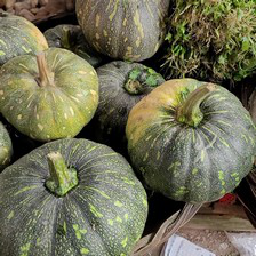

In [12]:
ku.load_img(r'C:\Users\SmartDB\Python\DL\veg_test\Pumpkin\1030.jpg',target_size=(256,256))

In [13]:
predict('1008.jpg')

1/1 [==============================] - 0s 29ms/step


7